#22.1 ODE Initial Value Problem Statement

A differential equation is a relationship between a function, f(x), its independent variable, x, and any number of its derivatives. An ordinary differential equation or ODE is a differential equation where the independent variable, and therefore also the derivatives, is in one dimension. For the purpose of this book, we assume that an ODE can be written

$F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}},$

where $F$ is an arbitrary function that incorporates one or all of the input arguments, and $n$ is the order of the differential equation. This equation is referred to as an $n^{th}$ order ODE.

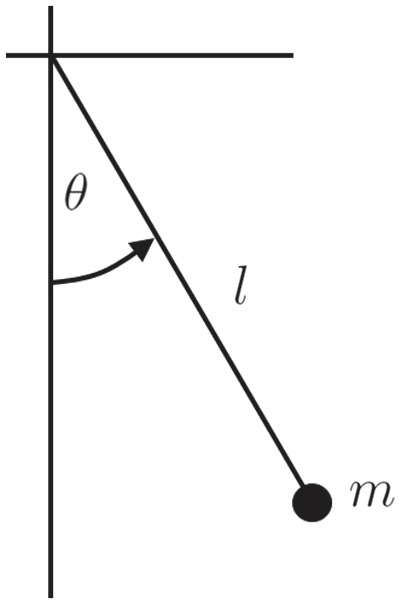

To give an example of an ODE, consider a pendulum of length $l$ with a mass, $m$, at its end (see the figure above). The angle the pendulum makes with the vertical axis over time, $\Theta(t)$, in the presence of vertical gravity, $g$, can be described by the pendulum equation, which is the ODE

$ml\frac{d^2\Theta(t)}{dt^2} = -mg \sin(\Theta(t)).$

This equation can be derived by summing the forces in the $x$ and $y$ direction, and then changing to polar coordinates.

In contrast, a partial differential equation or PDE is a general form differential equation where x is a vector containing the independent variables $x_1,x_2,x_3,…,x_m$, and the partial derivatives can be of any order and with respect to any combination of variables. An example of a PDE is the heat equation, which describes the evolution of temperature in space over time:

$\frac{\partial u(t, x, y, z)}{\partial t} = \alpha\left(\frac{\partial u(t, x, y, z)}{\partial x} + \frac{\partial u(t, x, y, z)}{\partial y} + \frac{\partial u(t, x, y, z)}{\partial z}\right).$

Here, $u(t,x,y,z)$ is the temperature at $(x,y,z)$ at time $t$, and $\alpha$ is a thermal diffusion constant.



A general solution to a differential equation is a $g(x)$ that satisfies the differential equation. Although there are usually many solutions to a differential equation, they are still hard to find. For an ODE of order $n$, a particular solution is a $p(x)$ that satisfies the differential equation and $n$ explicitly known values of the solution, or its derivatives, at certain points. Generally stated, $p(x)$ must satisfy the differential equation and $p^{(j)}(x_i) = p_i$ where $p^{(j)}$ is the $j^{th}$ derivative of $p$, for $n$ triplets, $(j,x_i,p_i)$. For the purpose of this text, we refer to the particular solution simply as the solution.


Returning to the pendulum example, if we assume the angles are very small (i.e., $\sin(\Theta(t)) \approx \Theta(t)$), then the pendulum equation reduces to $l\frac{d^2\Theta(t)}{dt^2} = -g\Theta(t).$

$\Theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ is a general solution to the pendulum equation. If the angle and angular velocities at $t=0$ are the known values, $\Theta_0$ and $0$, respectively, verify that $\Theta(t) = \Theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)$ is a particular solution for these known values. 

For the general solution, the derivatives of $\Theta(t)$ are $\frac{d\Theta(t)}{dt} = -\sqrt{\frac{g}{l}}\sin\left(\sqrt{\frac{g}{l}}t\right)$ 

and 

$\frac{d^2\Theta(t)}{dt^2} = -\frac{g}{l}\cos\left(\sqrt{\frac{g}{l}}t\right).$

By plugging the second derivative back into the differential equation on the left side, it is easy to verify that $\Theta(t)$ satisfies the equation and so is a general solution.

For the particular solution, the $\Theta_0$ coefficient will carry through the derivatives, and it can be verified that the equation is satisfied. $\Theta(0) = \Theta_0, \cos(0) = \Theta_0$, and $0 = -\Theta_0 \sqrt{\frac{g}{l}}\sin(0) = 0$, therefore the particular solution also satisfies the known values.

#22.2 Reduction of Order

Many numerical methods for solving initial value problems are designed specifically to solve first-order differential equations. To make these solvers useful for solving higher order differential equations, we must often reduce the order of the differential equation to first order. To reduce the order of a differential equation, consider a vector, $S(t)$, which is the state of the system as a function of time. In general, the state of a system is a collection of all the dependent variables that are relevant to the behavior of the system. Recalling that the ODEs of interest in this book can be expressed as

$f^{(n)}(t) = F\left(t, f(t), f^{(1)}(t), f^{(2)}(t), f^{(3)}(t),\ldots, f^{(n-1)}(t)\right),$

for initial value problems, it is useful to take the state to be



$\begin{split}
S(t) =\left[\begin{array}{c}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\cdots \\
f^{(n-1)}(t)
\end{array}\right].
\end{split}$

Then the derivative of the state is

$\begin{split}
\frac{dS(t)}{dt} =\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
f^{(n)}(t)
\end{array}\right]\!=\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
F\left(t, f(t), f^{(1)}(t),\ldots, f^{(n-1)}(t)\right)
\end{array}\right]\!=\!\left[\begin{array}{c}
S_2(t) \\
S_3(t) \\
S_4(t) \\
S_5(t) \\
\cdots \\
F\left(t, S_1(t), S_2(t),\ldots, S_{n-1}(t)\right)
\end{array}\right]\!,
\end{split}$

where $S_i(t)$ is the $i^{th}$ element of $S(t)$. With the state written in this way, $\frac{dS(t)}{dt}$ can be written using only $S(t)$ (i.e., no $f(t)$) or its derivatives. 

In particular, $\frac{dS(t)}{dt} = {\mathcal{F}}(t,S(t))$ where $\mathcal{F}$ is a function that appropriately assembles the vector describing the derivative of the state. This equation is in the form of a first-order differential equation in $S$. Essentially, what we have done is turn an $n^{th}$ order ODE into $n$ first order ODEs that are coupled together, meaning they share the same terms.

Reduce the second order pendulum equation to first order, where

$\begin{split}
S(t) =\left[\begin{array}{c}
\Theta(t) \\
\dot{\Theta}(t)
\end{array}\right].
\end{split}$

Taking the derivative of S(t) and substituting gives the correct expression.

$\begin{split}
\frac{dS(t)}{dt} =\left[\begin{array}{c}
S_2(t) \\
-\frac{g}{l}S_1(t)
\end{array}\right]
\end{split}$

It happens that this ODE can be written in matrix form:

$\begin{split}
\frac{dS(t)}{dt} =\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t)
\end{split}$

ODEs that can be written in this way are said to be **linear ODEs**.

Although reducing the order of an ODE to first order results in an ODE with multiple variables, all the derivatives are still taken with respect to the same independent variable, $t$. Therefore, the ordinariness of the differential equation is retained.

It is worth noting that the state can hold multiple dependent variables and their derivatives as long as the derivatives are with respect to the same independent variable.

#22.3 The Euler Method

Let $\frac{dS(t)}{dt} = F(t,S(t))$ be be an explicitly defined first order ODE. That is, $F$ is a function that returns the derivative, or change, of a state given a time and state value. Also, let $t$ be a numerical grid of the interval $[t_0,t_f]$ with spacing $h$. Without loss of generality, we assume that $t_0=0$, and that $tf=Nh$ for some positive integer, $N$.

The linear approximation of $S(t)$ around $t_j$ at $t_{j+1}$ is

$S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt}$,

which can also be written as

$S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).$

This formula is called the Explicit Euler Formula, and it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_0=S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$; these $S(t)$ values are then an approximation for the solution of the differential equation. The Explicit Euler formula is the simplest and most intuitive method for solving initial value problems. At any state $(t_j,S(t_j))$ it uses $F$ at that state to “point” toward the next state and then moves in that direction a distance of $h$. Although there are more sophisticated and accurate methods for solving these problems, they all have the same fundamental structure. As such, we enumerate explicitly the steps for solving an initial value problem using the Explicit Euler formula.




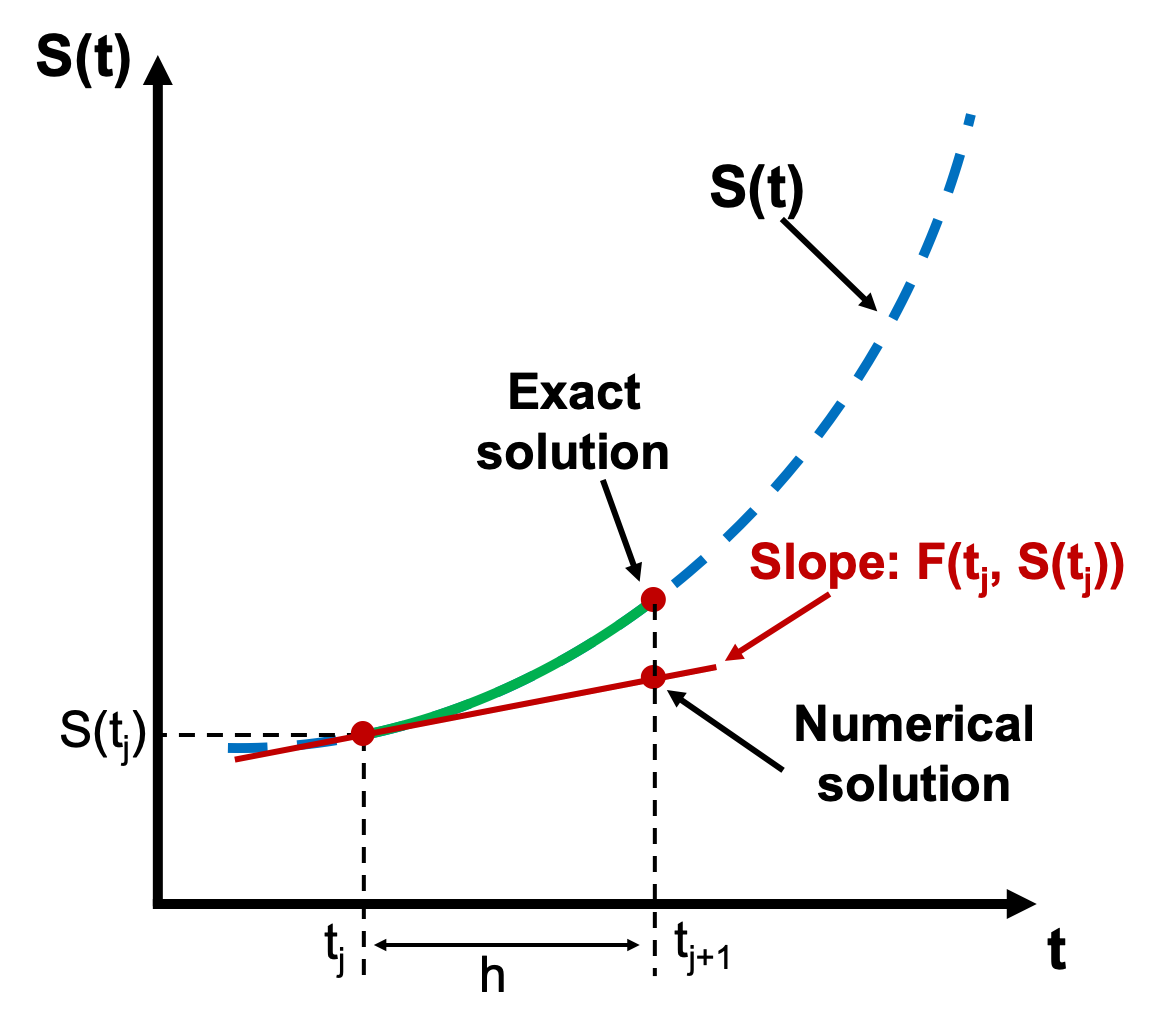

**Example:**

The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_0=−1$ has the exact solution $f(t)=−e^{−t}$. Approximate the solution to this initial value problem between $0$ and $1$ in increments of $0.1$ using the Explicity Euler Formula. Plot the difference between the approximated solution and the exact solution.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

f = lambda t, s: np.exp(-t) 
h = 0.1
t = np.arange(0, 1 + h, h) 
s0 = -1 

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

print(s)

[-1.         -0.9        -0.80951626 -0.72764318 -0.65356136 -0.58652936
 -0.52587629 -0.47099513 -0.4213366  -0.3764037  -0.33574673]


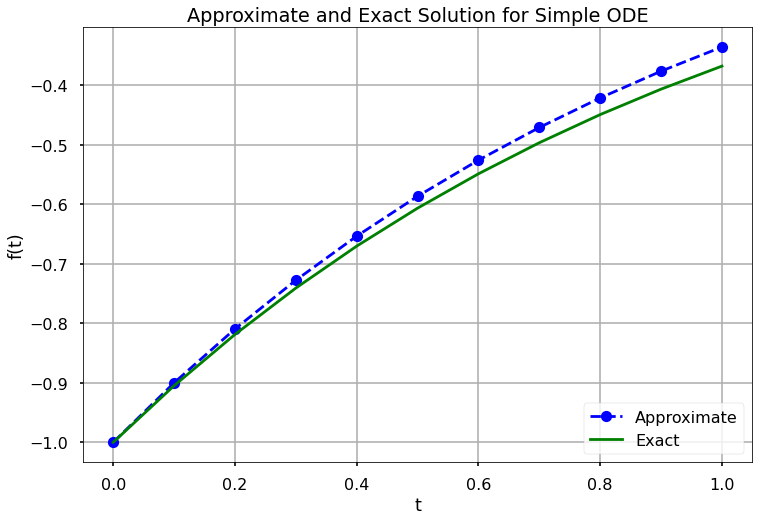

In [49]:
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Example:**

Plot an approximation of $\frac{df(t)}{dt} = t^2$ for initial condition $f_0=−1$ has the exact solution $f(t)= \frac{-1}{t+1}.$


In [50]:
s0 = -1
f = lambda s, t: s**2
t = np.linspace(0, 5, 40)

s = np.zeros(len(t))
s[0] = s0
    
for i in range(0,len(t)-1):
        s[i+1] = s[i] + f(s[i],t[i])*(t[i+1] - t[i])
print(s)

[-1.         -0.87179487 -0.7743556  -0.6974804  -0.63511131 -0.58339767
 -0.53976269 -0.50241093 -0.47004981 -0.44172329 -0.41670797 -0.39444573
 -0.37449862 -0.35651795 -0.34022243 -0.32538252 -0.31180896 -0.29934424
 -0.28785616 -0.27723294 -0.26737933 -0.25821373 -0.24966574 -0.24167433
 -0.23418632 -0.22715514 -0.22053982 -0.21430421 -0.20841622 -0.20284733
 -0.19757207 -0.19256762 -0.18781348 -0.18329118 -0.17898405 -0.17487696
 -0.1709562  -0.16720927 -0.16362479 -0.16019235]


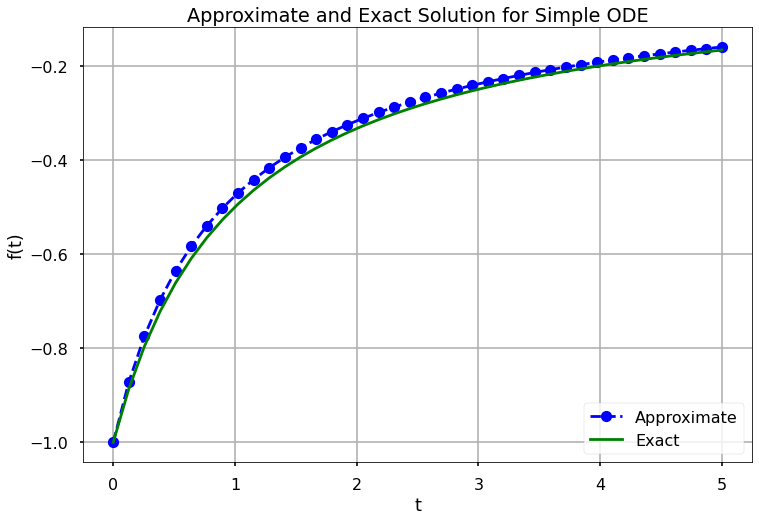

In [51]:
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -1/(t+1), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()